In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()



('2017-08-23',)

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = "2017-08-23"
(dt.datetime.strptime(start_date, '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')


'2016-08-23'

In [108]:
# Perform a query to retrieve the date and precipitation scores
query1 = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23').\
    all()

In [109]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query1, columns=['Date', 'Precipitation'])
df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [110]:
# Sort the dataframe by date
df_sorted_by_date = df.sort_values(["Date"])
df_sorted_by_date.head()

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


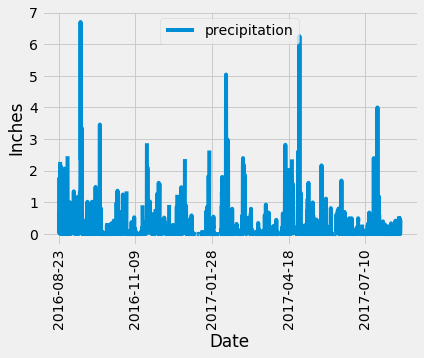

In [117]:
# Use Pandas Plotting with Matplotlib to plot the data
df_sorted_by_date.plot(x="Date", y="Precipitation")
plt.ylabel("Inches")
plt.legend(["precipitation"],loc="best")
plt.xticks(rotation=90)
plt.show()

In [118]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted_by_date.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [119]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [120]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f8bc8b31a10>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [131]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
records = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).order_by(func.count(Measurement.station).\
            desc())
for r in records:
    print(r)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
